## カリフォルニア州住宅価格

California Housingデータセットは、カリフォルニア州の住宅価格に関する情報を含む一連のデータです。

データセットには、以下の特徴量が含まれています：

1. **MedInc**: 各地区の収入の中央値。
2. **HouseAge**: 各地区の住宅の中央年齢。
3. **AveRooms**: 各地区の平均部屋数。
4. **AveBedrms**: 各地区の平均ベッドルーム数。
5. **Population**: 各地区の人口。
6. **AveOccup**: 各地区の平均住宅占有率。
7. **Latitude**: 各地区の緯度。
8. **Longitude**: 各地区の経度。

また、各地区の住宅価格の中央値がターゲット変数として提供されています。

## 1. 基本統計量の算出

### GPT プロンプト : データのインポート
* from sklearn.datasets import fetch_california_housing を利用
* fetch_california_housing()でデータセットをロード
* 特徴量を含むデータフレームに変換する。ターゲット列をデータフレームに追加する
* データフレーム名はdfとする
* データフレームdfを表示する
* Pythonコード

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# California Housingデータセットのロード
california_housing = fetch_california_housing()

# 特徴量を含むDataFrameの作成
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# ターゲット列をDataFrameに追加
df['target'] = california_housing.target

df.to_csv('california_housing_data.csv', index=False)

# データフレームdfの表示
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

### GPT プロンプト : 基本統計量の算出
1. **MedInc**: 各地区の収入の中央値。
2. **HouseAge**: 各地区の住宅の中央年齢。
3. **AveRooms**: 各地区の平均部屋数。
4. **AveBedrms**: 各地区の平均ベッドルーム数。
5. **Population**: 各地区の人口。
6. **AveOccup**: 各地区の平均住宅占有率。
7. **Latitude**: 各地区の緯度。
8. **Longitude**: 各地区の経度。
9. **target**: 各地区の住宅価格の中央値。
* このデータ構造を使う
* データフレームdfの基本統計量を算出
* 基本統計量をcsvで保存
* 基本統計量をヒートマップで表示
* Pythonコード

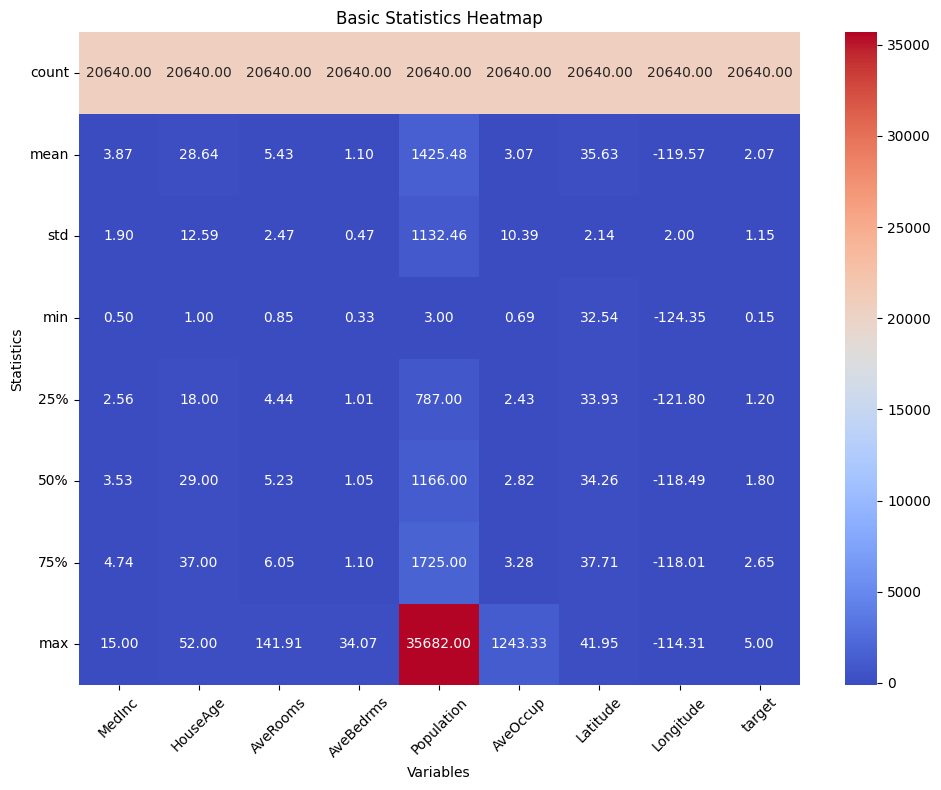

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 基本統計量の算出
summary = df.describe()

# CSVファイルに保存
summary.to_csv('basic_statistics.csv')

# ヒートマップの表示
plt.figure(figsize=(10, 8))
sns.heatmap(summary, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Basic Statistics Heatmap')
plt.xlabel('Variables')
plt.ylabel('Statistics')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### GPTプロンプト：地図表示
* データフレームdfにあるLatitude, Longitudeを使い地図上にプロットする
* foliumライブラリを使い地図表示を行う
* 10件に1個の割合でレコードをプロットする
* Pythonコード

In [7]:
import folium

# 地図の中心を設定（カリフォルニア州の中心付近）
map_center = [36.7783, -119.4179]

# foliumの地図オブジェクトを作成
mymap = folium.Map(location=map_center, zoom_start=6)

# データフレームdfから10件に1つの割合でレコードを取得し、地図上にマーカーとしてプロット
for index, row in df.iloc[::10].iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    marker = folium.Marker([lat, lon], popup=f'Latitude: {lat}, Longitude: {lon}')
    marker.add_to(mymap)

# 地図を表示
mymap


## 1. 基本統計量の算出：箱ひげ図

ボックスプロット（箱ひげ図）は、データの分布を視覚的に表現するための統計的グラフです。データの中央値、四分位範囲（データの広がりや散らばり具合）、外れ値を示すことができます。以下はボックスプロットの主な構成要素です：

1. **中央値（メディアン）**: データセットを二等分する値で、ボックスプロットの中央に横線で表示されます。
2. **四分位範囲（IQR: Interquartile Range）**: 下位25%（第1四分位数、Q1）と上位25%（第3四分位数、Q3）のデータの範囲を示します。この範囲はボックスの形で表され、データの中心的な50%を含みます。
3. **ボックス**: 第1四分位数から第3四分位数までの範囲を示し、データの中央50%がこの範囲に含まれます。
4. **ひげ（ホイスカー）**: ボックスの外に伸びる線で、通常、第1四分位数から1.5*IQRよりも低いデータ点と、第3四分位数から1.5*IQRよりも高いデータ点までを示します。これにより、データの全範囲（外れ値を除く）が視覚化されます。
5. **外れ値**: ひげの外にあるデータポイントで、通常は点で表されます。これらは、他のデータと比較して異常に高い値または低い値を持つデータポイントです。

ボックスプロットは、データセット内の異常値の検出、データの散らばり度合いの評価、そして異なるデータセットの中央値や分布の比較に特に有用です。データの分布形状（対称性や歪み）について直接的な情報は提供しませんが、データの要約として非常に役立ちます。

### GPT プロンプト : 箱ひげ図
* 数値カラムのボックスプロットを作成
* ボックスプロットの要約統計量をDataFrameに変換し、CSVファイルとして保存
* グラフは1行に5つのプロットが表示
* 各ボックスプロットには、それぞれのカラム名がタイトルとして表示
* boxplotは縦向き
* Pythonコード

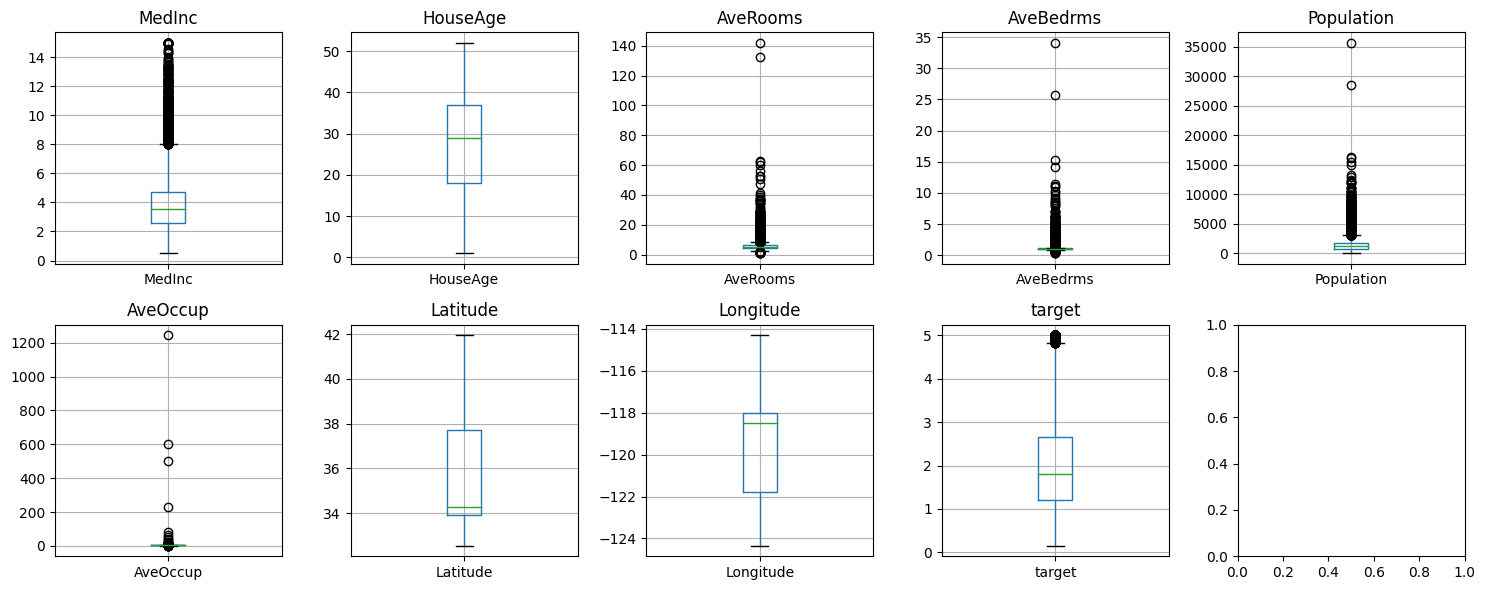

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 数値カラムのみを抽出
numeric_columns = df.select_dtypes(include=['number']).columns

# ボックスプロットの作成
num_plots = len(numeric_columns)
num_rows = num_plots // 5 + int(num_plots % 5 > 0)  # 5つのプロットが1行に表示される
fig, axes = plt.subplots(num_rows, 5, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

# グラフの余白調整
plt.tight_layout()

# 要約統計量のDataFrameを作成し、CSVファイルに保存
summary_stats = df.describe().transpose()
summary_stats.to_csv('summary_statistics.csv')

plt.show()


## 2. データの可視化：ヒストグラム

### GPT プロンプト : ヒストグラム
* 全ての数値カラムのヒストグラムを作成
* グラフは1行に3つのグラフが表示
* グラフの行数は数値カラムで決める
* 各ヒストグラムには、それぞれのカラム名がタイトルとして表示
* ヒストグラムは縦向き
* Pythonコード

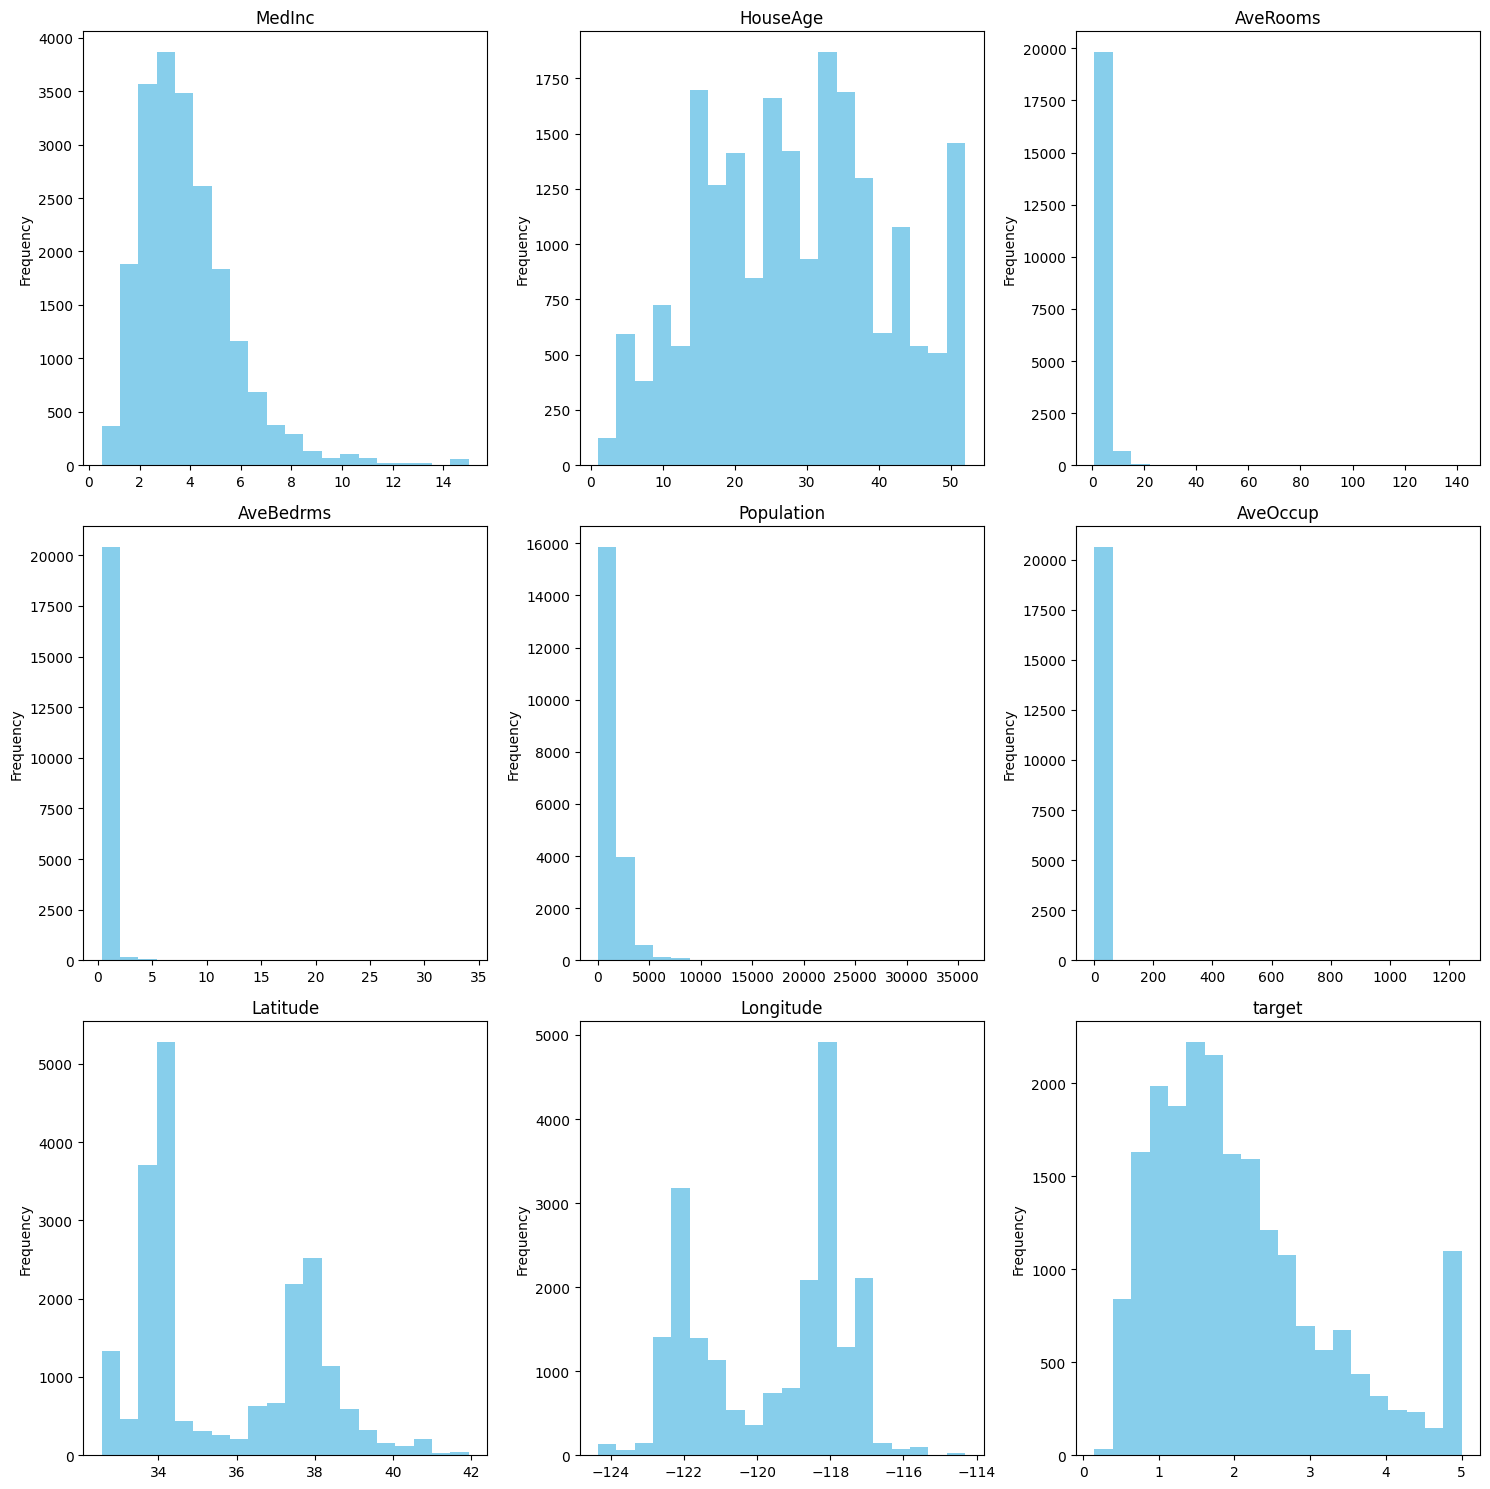

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# グラフの描画
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# カラムごとにヒストグラムを描画
for i, col in enumerate(df.columns):
    ax = axs[i // 3, i % 3]  # サブプロットにアクセスする
    df[col].plot(kind='hist', ax=ax, color='skyblue', bins=20)  # ヒストグラムを描画
    ax.set_title(col)

# グラフ間のスペースを調整
plt.tight_layout()
plt.show()


## 2. データの可視化：散布図

量的データと質的データの組み合わせを可視化するためのさまざまな方法を以下にまとめます。

1. **散布図（Scatter plot）**: 量 × 量
   - 量的変数と量的変数の関係を視覚化するのに適しています。
   - 例えば、身長（量的データ）と体重（量的データ）の関係を見ることができます。
   - 質的変数が2つの場合は、散布図の色分けやマーカーの形状を使って区別することができます。

2. **箱ひげ図（Boxplot）**: 質 × 量
   - 量的変数を質的変数でグループ分けして、各グループの分布を比較するのに適しています。
   - 例えば、都道府県（質的データ）ごとに病院数（量的データ）の分布を比較することができます。

3. **クロス集計表（Cross-tabulation）**: 質 × 質
   - 2つの質的変数の関係をまとめた表です。各セルにはそれぞれの組み合わせに対応するデータの個数が表示されます。
   - 例えば、性別（質的データ）と好きなスポーツ（質的データ）の関係を示すことができます。

4. **グループ化された棒グラフ（Grouped bar chart）**: 積み上げグラフ
   - 2つの質的変数の組み合わせによる量的変数の平均値などの統計量を視覚化するのに適しています。
   - 例えば、都道府県（質的データ）ごとに男女の平均身長（量的データ）を比較することができます。

5. **バブルチャート（Bubble chart）**:
   - 2つの量的変数と1つの質的変数を組み合わせて可視化するのに使用されます。
   - 例えば、都道府県（質的データ）ごとの人口（量的データ）、平均所得（量的データ）をバブルの大きさや色で表現することができます。

これらの方法を使用することで、量的データと質的データの組み合わせによるパターンや関係を効果的に可視化することができます。

### GPT プロンプト : 散布図
* 全ての数値カラムの組み合わせで散布図を作成
* seabornのライブラリを使い、マトリックス表示
* 回帰直線も描く
* Pythonコード

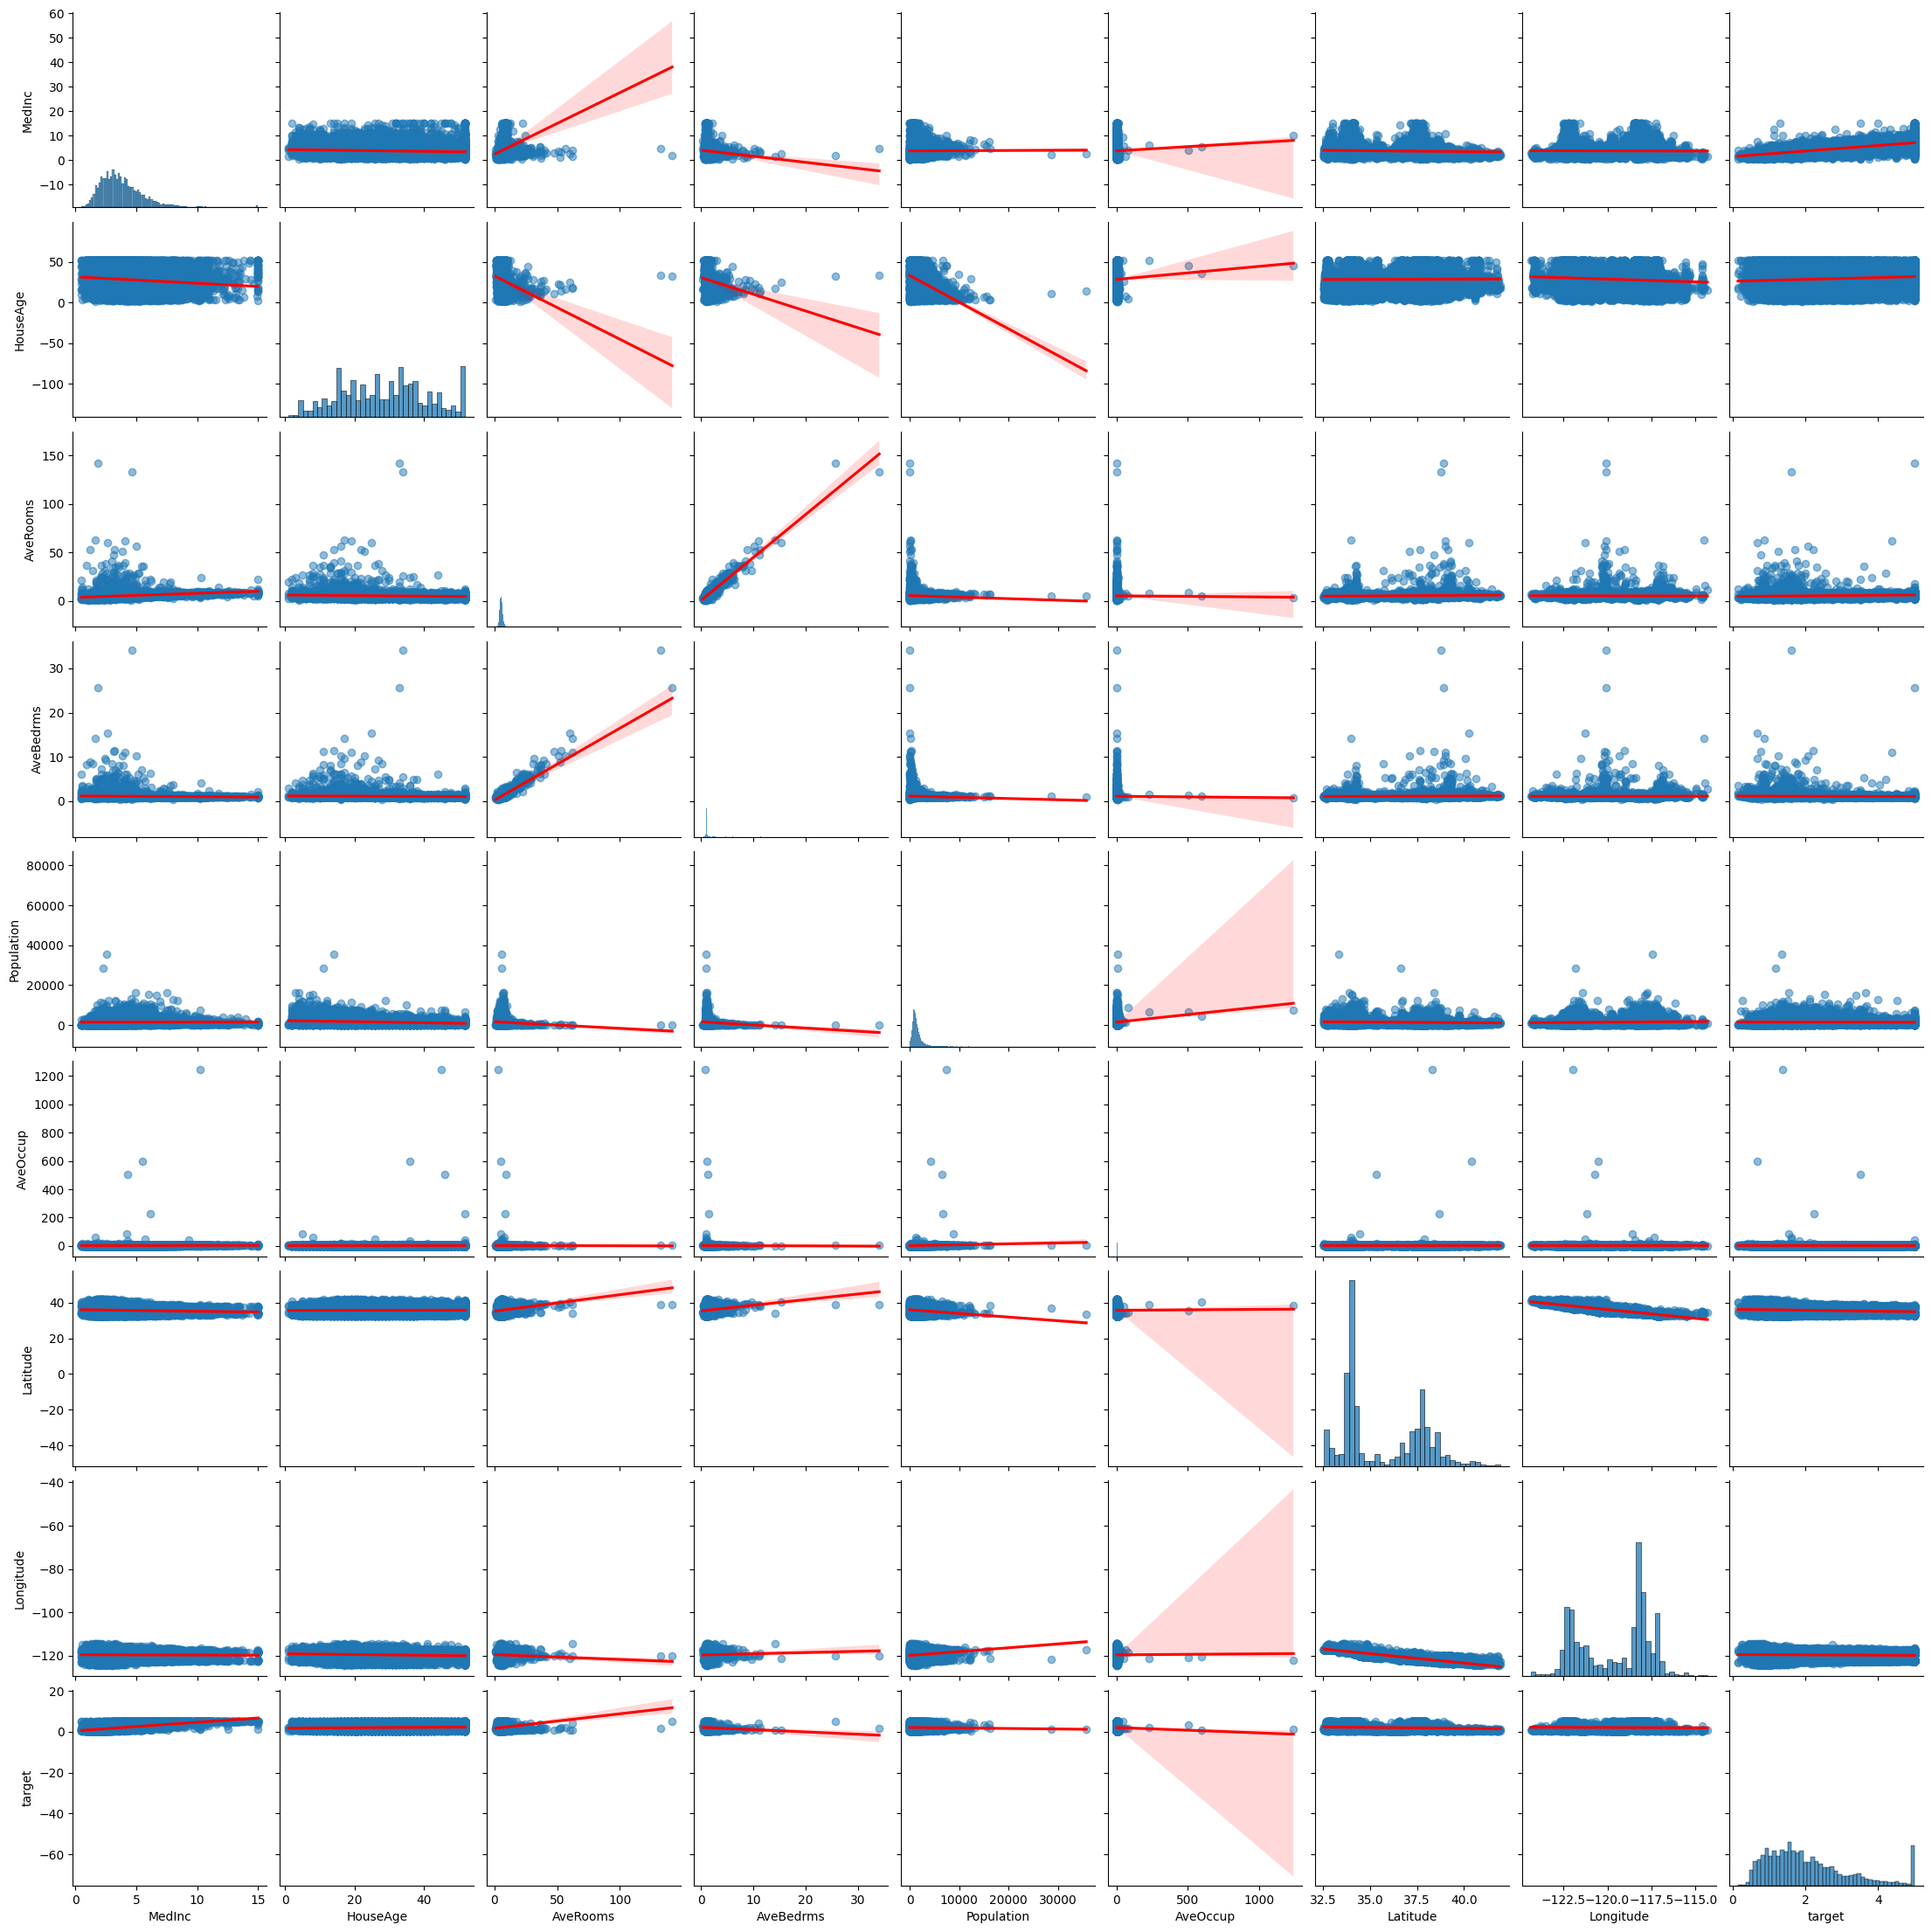

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 散布図行列の描画
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.show()


## 2. データの可視化：相関係数行列

### GPT プロンプト : 相関係数行列
* 全ての数値カラムの組み合わせで相関係数行列を作成
* ヒートマップで表示
* Pythonコード

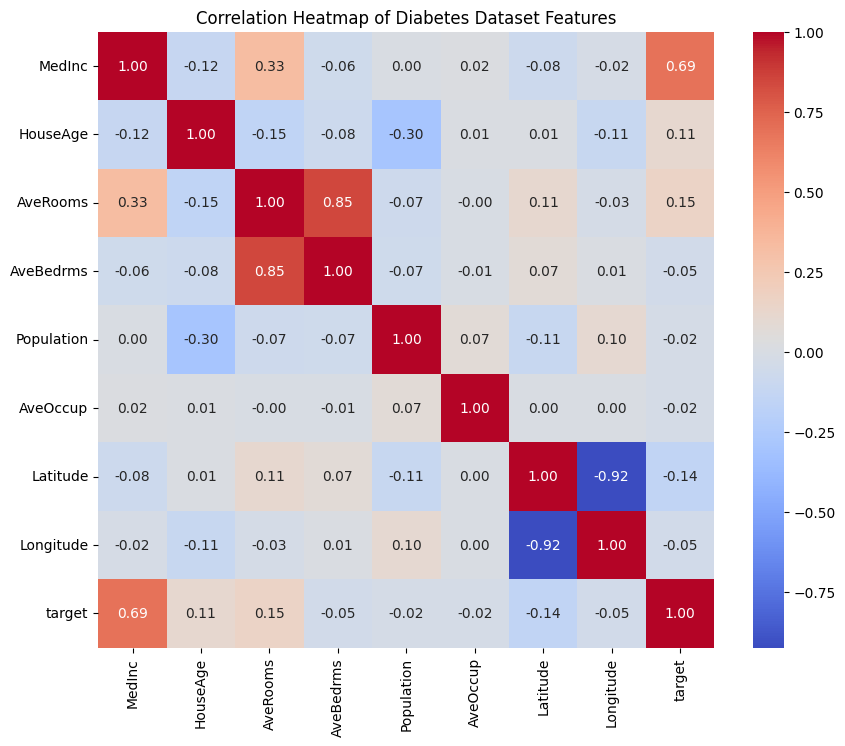

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 相関係数行列を計算
corr_matrix = df.corr()

# ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Diabetes Dataset Features')
plt.show()


## 3. 重回帰分析

このコードは、与えられたデータフレーム内の複数の目的変数に対して、線形回帰モデルを構築し、その性能を評価するための手順を実行します。具体的な手順は以下の通りです：

1. **データの準備**: 元のデータフレームをコピーし、目的変数のリストを取得します。

2. **ループ処理**: 各目的変数に対してループを行います。

3. **相関が高い説明変数の削除**: 目的変数との相関が高い説明変数同士のうち、目的変数との相関が小さい方を削除します。これにより、多重共線性の影響を軽減し、モデルの解釈性を向上させます。

4. **説明変数と目的変数の準備**: 残った説明変数と目的変数を準備します。

5. **訓練データとテストデータの分割**: データを訓練データとテストデータに分割します。

6. **線形回帰モデルの構築と学習**: 訓練データを用いて線形回帰モデルを構築し、学習させます。

7. **予測値の計算**: テストデータを用いて目的変数の予測値を計算します。

8. **評価指標の計算**: 予測値と実際の値の比較を通じて、モデルの性能を評価します。ここではR^2値が使用されます。

9. **グラフの描画**: 実際の値と予測値の散布図を描画し、モデルの予測性能を視覚化します。

10. **係数と切片の表示**: 使用されている説明変数とその係数、切片を表示し、モデルの構造を解釈します。

11. **グラフの整理**: 不要な部分を削除して、グラフのレイアウトを整えます。

以上の手順を通じて、複数の目的変数に対する線形回帰モデルの構築と評価が行われます。

### GPT プロンプト
* データフレームdfを利用する。
* 目的変数としてtargetを選択し、説明変数としてその他全てのカラムを使う
* statsmodelを利用して、重回帰分析を行う
* 統計的な要約(summary)を表示する。
* target予測値を 'predicted_value' 列をデータフレームに追加し、実際の値と予測された値の比較を行う。
* 実際の値と予測された値(predicted_value)の比較グラフ
* 予測値と実際の値の誤差を計算し、日付を横軸にしてプロットする(残差プロット)。
* 実際の値と予測された値の散布図をプロットし、完全な予測を示す対角線を含めるグラフ
* AIC（赤池情報量基準）、決定係数$R^2$ 、および自由度修正済み決定係数$R^2_{adj}$ の値を表示
* RMSEを表示
* Pythonコード

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:35:28   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

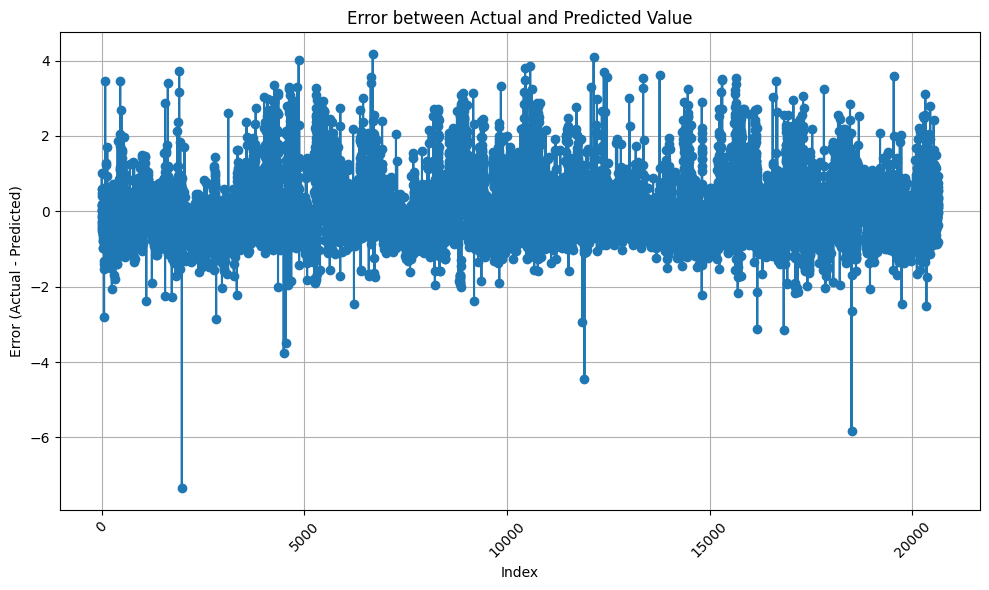

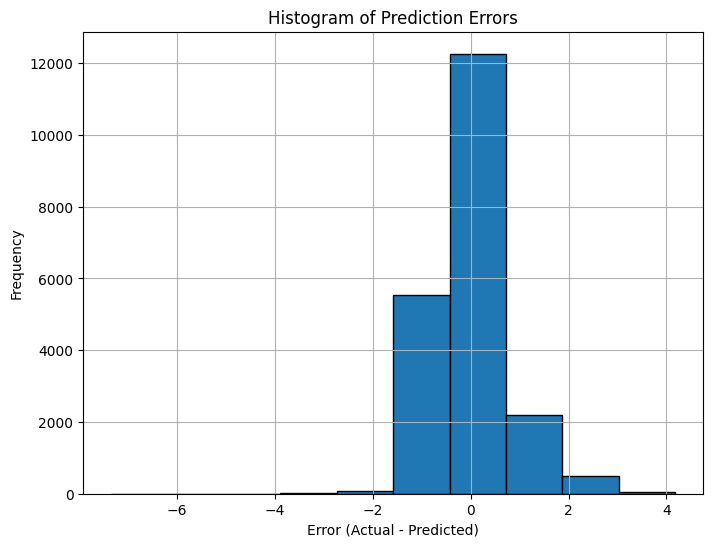

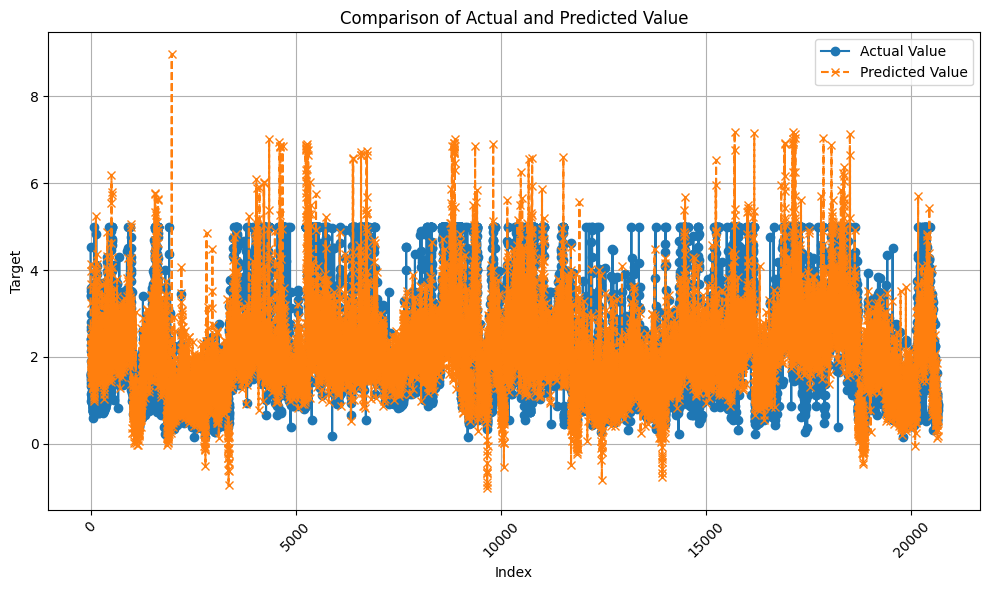

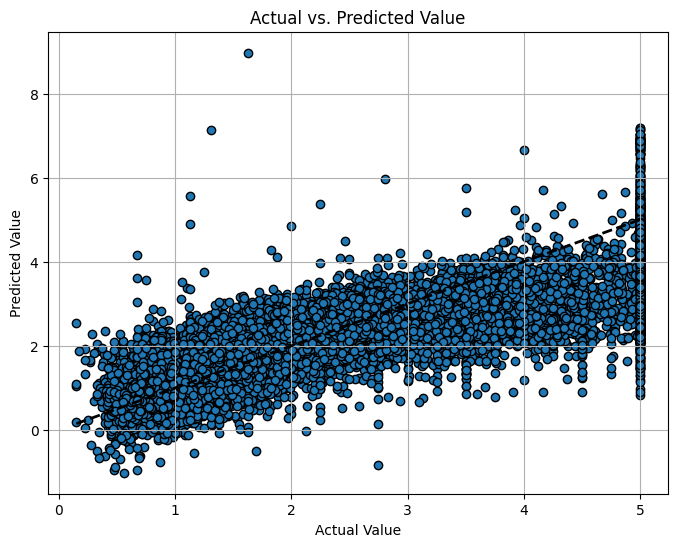

AIC: 45265.541611265886
R-squared: 0.6062326851998052
Adjusted R-squared: 0.6060799956298182
RMSE: 0.72


In [12]:
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error

X = df[['MedInc',	'HouseAge',	'AveRooms',	'AveBedrms',	'Population',	'AveOccup',	'Latitude',	'Longitude']].copy()
y = df['target']

# 定数項を追加
X_with_const = sm.add_constant(X)

# モデルの構築
model = sm.OLS(y, X_with_const).fit()

# 統計的な要約を表示
print(model.summary())

# 予測値を計算し、データフレームに追加
df['predicted_value'] = model.predict(X_with_const)

# 予測値と実際の値の誤差を計算し、プロットする
df['error'] = df['target'] - df['predicted_value']

plt.figure(figsize=(10, 6))
plt.plot(range(len(df)), df['error'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error (Actual - Predicted)')
plt.title('Error between Actual and Predicted Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 誤差のヒストグラムを描く
plt.figure(figsize=(8, 6))
plt.hist(df['error'], bins=10, edgecolor='black')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()

# 実際の需要と予測された需要をプロットするためのグラフ
plt.figure(figsize=(10, 6))
plt.plot(range(len(df)), df['target'], marker='o', linestyle='-', label='Actual Value')
plt.plot(range(len(df)), df['predicted_value'], marker='x', linestyle='--', label='Predicted Value')
plt.xlabel('Index')
plt.ylabel('Target')
plt.title('Comparison of Actual and Predicted Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 実際の値と予測値の散布図をプロットし、完全な予測を示す対角線を描く
plt.figure(figsize=(8, 6))
plt.scatter(df['target'], df['predicted_value'], edgecolor='black')
plt.plot([df['target'].min(), df['target'].max()], [df['target'].min(), df['target'].max()], 'k--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Value')
plt.grid(True)
plt.show()

print(f"AIC: {model.aic}")
print(f"R-squared: {model.rsquared}")
print(f"Adjusted R-squared: {model.rsquared_adj}")

# RMSEの計算
rmse = sqrt(mean_squared_error(df['target'], df['predicted_value']))
print(f"RMSE: {rmse:.2f}")



### GPT プロンプト
* この回帰モデルを関数化
* 簡単な例で予測を行う
* Pythonコード

In [13]:
def predict_value(MedInc,	HouseAge,	AveRooms,	AveBedrms,	Population,	AveOccup,	Latitude,	Longitude):
    # 予測用のデータフレームを作成
    X_new = pd.DataFrame({'const': 1, 'MedInc': [MedInc], 'HouseAge': [HouseAge], 'AveRooms': [AveRooms], 'AveBedrms': [AveBedrms], 'Population': [Population], 'AveOccup': [AveOccup], 'Latitude': [Latitude], 'Longitude': [Longitude]})
    # 需要を予測
    predicted_value = model.predict(X_new)
    return predicted_value.iloc[0]

predicted_value_example = predict_value(MedInc=8.3252,	HouseAge=41.0,	AveRooms=6.984127,	AveBedrms=1.023810,	Population=322.0,	AveOccup=2.555556,	Latitude=37.88,	Longitude=-122.23)
print(f"Predicted Value: {predicted_value_example:.2f}")


Predicted Value: 4.13


### Stepwise法での説明変数選択

### GPT プロンプト
* データフレームdfを用いて線形回帰を実施
* 目的変数はtarget
* 説明変数はtarget以外の数値カラムを候補とする
* statsmodelを利用する
* AICを基準としたstepwise法により、説明変数を選択する
* AICの推移を可視化する
* 交差検証法(cv=5)で精度確認をする
* 予測値と実際の需要を含む 'stepwise_value' 列をデータフレームに追加し、実際の需要と予測された需要の比較を行う。
* 実際の値と予測された値(stepwise_value)の比較グラフ
* 予測値と実際の値の誤差を計算し、indexを横軸にしてプロットする(残差プロット)。
* 実際の値と予測された値の散布図をプロットし、完全な予測を示す対角線を含めるグラフ
* AIC（赤池情報量基準）、決定係数$R^2$ 、および自由度修正済み決定係数$R^2_{adj}$、RMSEの値を表示
* Pythonコード

Add  MedInc                         with p-value 0.0
Add  HouseAge                       with p-value 0.0
Add  Latitude                       with p-value 2.12019e-76
Add  Longitude                      with p-value 0.0
Add  AveBedrms                      with p-value 1.88186e-55
Add  AveRooms                       with p-value 6.88482e-72
Add  AveOccup                       with p-value 3.98559e-15
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:45:48   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:

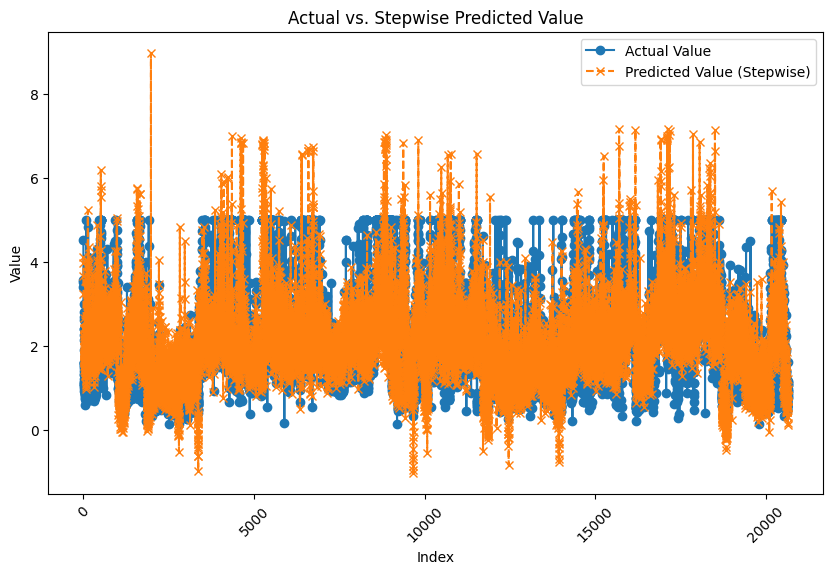

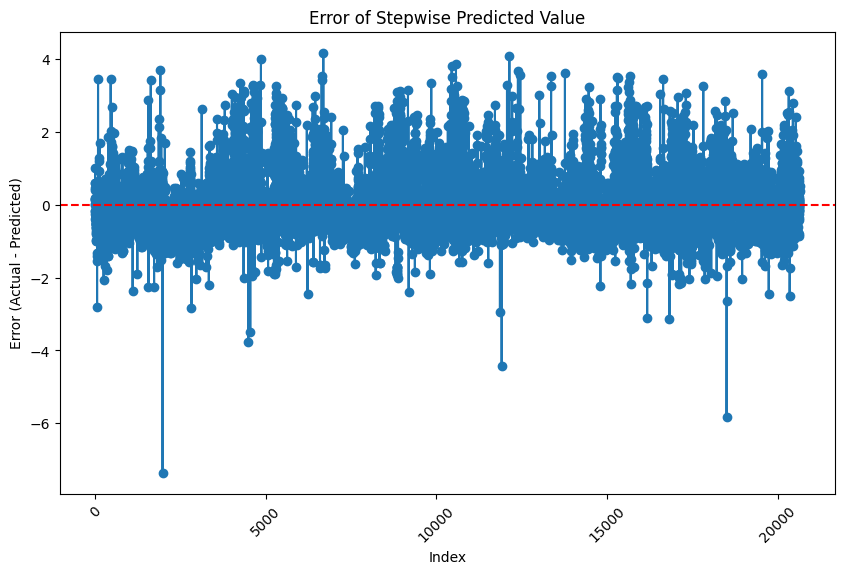

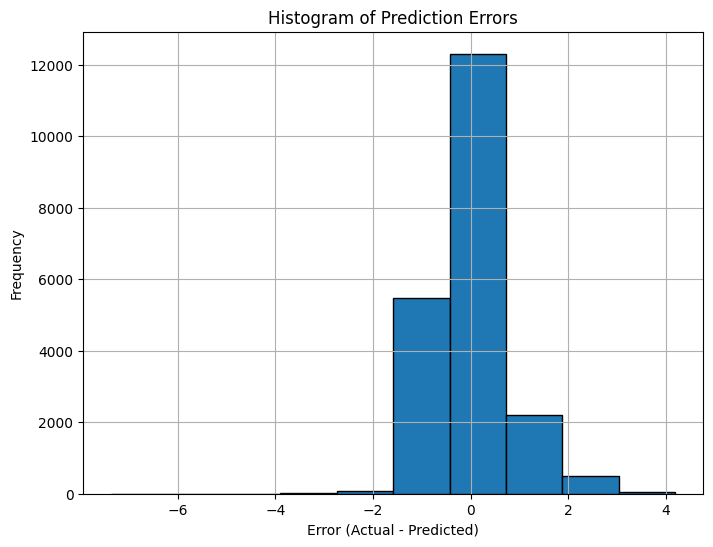

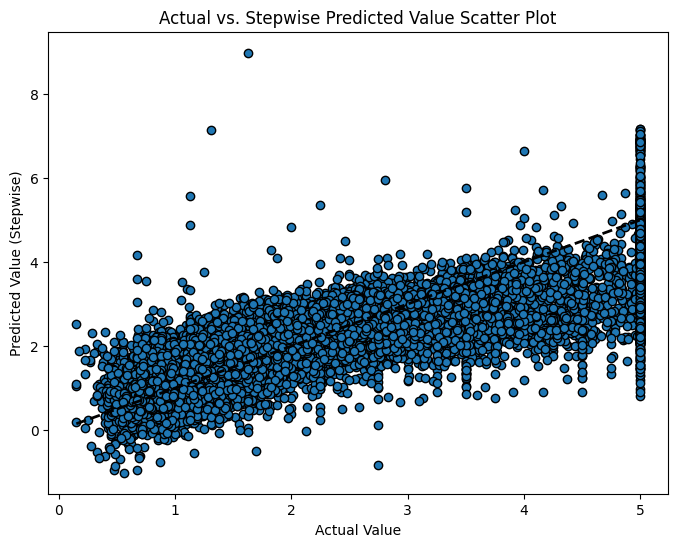

AIC: 45264.24293611405
R-squared: 0.6062193051855558
Adjusted R-squared: 0.6060857037478037
Stepwise RMSE: 0.72


In [14]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# ステップワイズ選択の関数（AICを基準）
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# 説明変数（数値カラム）と目的変数を定義
X = df[['MedInc',	'HouseAge',	'AveRooms',	'AveBedrms',	'Population',	'AveOccup',	'Latitude',	'Longitude']].copy()
y = df['target']

# ステップワイズ選択を実行
selected_variables = stepwise_selection(X, y)

# 選択された変数を使用してモデルを構築
X_selected = sm.add_constant(df[selected_variables])
model = sm.OLS(y, X_selected).fit()

# 統計的な要約を表示
print(model.summary())

# 交差検証を使用した精度確認
kf = KFold(n_splits=5, shuffle=True, random_state=1)
rmse_scores = []

for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_cv = sm.OLS(y_train, X_train).fit()
    y_pred_cv = model_cv.predict(X_test)
    rmse_score = sqrt(mean_squared_error(y_test, y_pred_cv))
    rmse_scores.append(rmse_score)

average_rmse = sum(rmse_scores) / len(rmse_scores)
print(f"Average RMSE: {average_rmse:.2f}")


# 予測値を計算し、データフレームに追加
df['stepwise_value'] = model.predict(X_selected)

# 実際の需要と予測された需要の比較グラフ
plt.figure(figsize=(10, 6))
plt.plot(range(len(df)), df['target'], label='Actual Value', marker='o')
plt.plot(range(len(df)), df['stepwise_value'], label='Predicted Value (Stepwise)', linestyle='--', marker='x')
plt.xticks(rotation=45)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Stepwise Predicted Value')
plt.legend()
plt.show()

# 予測値と実際の値の誤差（残差プロット）
df['stepwise_error'] = df['target'] - df['stepwise_value']
plt.figure(figsize=(10, 6))
plt.plot(range(len(df)), df['stepwise_error'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Index')
plt.ylabel('Error (Actual - Predicted)')
plt.title('Error of Stepwise Predicted Value')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 誤差のヒストグラムを描く
plt.figure(figsize=(8, 6))
plt.hist(df['stepwise_error'], bins=10, edgecolor='black')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()


# 実際の需要と予測された需要の散布図
plt.figure(figsize=(8, 6))
plt.scatter(df['target'], df['stepwise_value'], edgecolor='black')
plt.plot([df['target'].min(), df['target'].max()], [df['target'].min(), df['target'].max()], 'k--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value (Stepwise)')
plt.title('Actual vs. Stepwise Predicted Value Scatter Plot')
plt.show()

print(f"AIC: {model.aic}")
print(f"R-squared: {model.rsquared}")
print(f"Adjusted R-squared: {model.rsquared_adj}")

# RMSEの計算と表示
stepwise_rmse = sqrt(mean_squared_error(df['target'], df['stepwise_value']))
print(f"Stepwise RMSE: {stepwise_rmse:.2f}")



## 4. 主成分分析

主成分分析（Principal Component Analysis、PCA）は、多変量データの次元削減とデータの可視化によく用いられる統計的手法です。PCAは、元の特徴量の情報をできるだけ保持しながら、新しい変数（主成分）にデータを変換することで、データセットの次元を削減します。

主成分分析の主な目的は、データの持つ情報を最大限に保持しながら、データの構造やパターンを理解することです。具体的には、以下のような利点があります：

1. **次元削減**:
   - 元のデータセットが多次元の場合、主成分分析はデータの次元を削減し、情報を失うことなくデータの本質的な特性を捉えます。これにより、高次元のデータをより低次元の空間にマッピングすることが可能になります。

2. **可視化**:
   - 主成分分析によって得られた主成分は、視覚化に適した形式であり、データセットの構造やパターンを理解するのに役立ちます。特に、2次元または3次元の主成分空間では、データをプロットして視覚的に解釈することが容易です。

3. **特徴量の重要度の理解**:
   - 主成分分析は、元の特徴量と主成分との関係性を示す主成分負荷（重み）を提供します。これにより、どの特徴量が主成分に大きく影響しているかを理解し、データセット内の重要なパターンや相関関係を特定することができます。

4. **ノイズの除去**:
   - 主成分分析は、データ内のノイズや冗長性を排除する効果があります。主成分はデータの変動性に基づいて決定されるため、ノイズの影響を減らし、データセットの本質的な構造をより良く捉えることができます。

総括すると、主成分分析は複雑なデータセットの解析や可視化、モデリングに広く使用される強力なツールです。データの情報を最大限に活用しながら、データセットの特性やパターンを効果的に把握することができます。

主成分分析（PCA）を実行する手順を以下に示します：

1. **データの準備**:
   - 分析対象のデータセットを準備します。データセットは観測値（サンプル）が行に配置され、それぞれの観測値に対する特徴量が列に配置されている必要があります。

2. **データの標準化**:
   - 主成分分析は、特徴量のスケールの違いが結果に影響を与える可能性があるため、特徴量を標準化します。これにより、すべての特徴量が平均が0で標準偏差が1になります。

3. **主成分分析の実行**:
   - 標準化されたデータに対してPCAを実行します。PCAは、特徴量間の共分散を考慮してデータを新しい特徴空間に射影することで、特徴量を線形に組み合わせた新しい特徴量（主成分）を生成します。

4. **主成分の選択**:
   - 主成分分析の結果得られる主成分は、元の特徴量の線形結合であり、元の特徴量の変動性を説明します。通常、累積寄与率や固有値などの指標を用いて、どの程度の主成分を選択するかを決定します。

5. **結果の解釈**:
   - 主成分の解釈は元の特徴量との関係性を理解することから始まります。主成分のウェイト（係数）を確認し、各主成分が元の特徴量とどのような関係を持っているかを分析します。

6. **結果の可視化**:
   - 主成分空間でのデータのプロットや主成分のウェイトの可視化を行うことで、データの構造や変数間の関係を理解しやすくします。

以上が主成分分析の一般的な手順です。この手順に従うことで、データセットの次元削減やパターンの特定など、さまざまな目的に応じた主成分分析を行うことができます。

### GPT プロンプト : 主成分分析

* 全ての数値カラムを利用(targetは除く)
* 利用数値カラムに対して、標準化を実施(StandardScaler)
* 累積寄与率80%で主成分分析を実施、以下得られた主成分のみを利用する
* 得られた各主成分の寄与率(explained_variance_ratio_)と、累積寄与率(np.cumsum())を計算し、累積寄与率を折れ線グラフで描く
* 主成分ごとの変数の重み（ウェイト）(components_)を取得し、各主成分の寄与率を加え、データフレーム化してcsvで保存
* 各主成分のカラムをx軸とした棒グラフを作成(説明変数のみ、主成分ごとグラフをかく)
* PC1とPC2の散布図を作成し、各カラムの方向を矢印で示し、カラム名を表示する。各点をtargetの値で色分けする
* Pythonコード

矢印の長さ、カラム名のラベルは各自調整

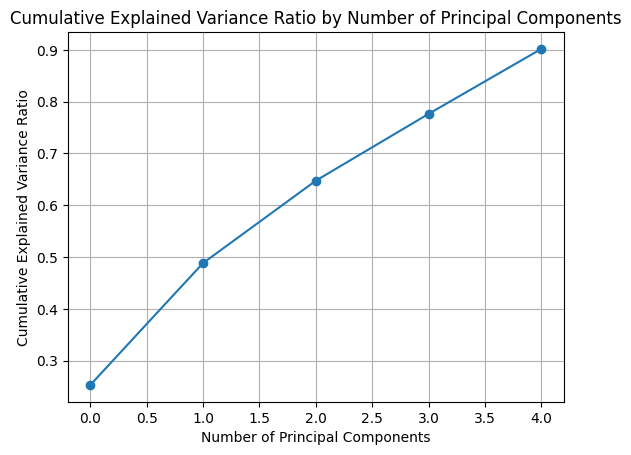

<Figure size 1000x600 with 0 Axes>

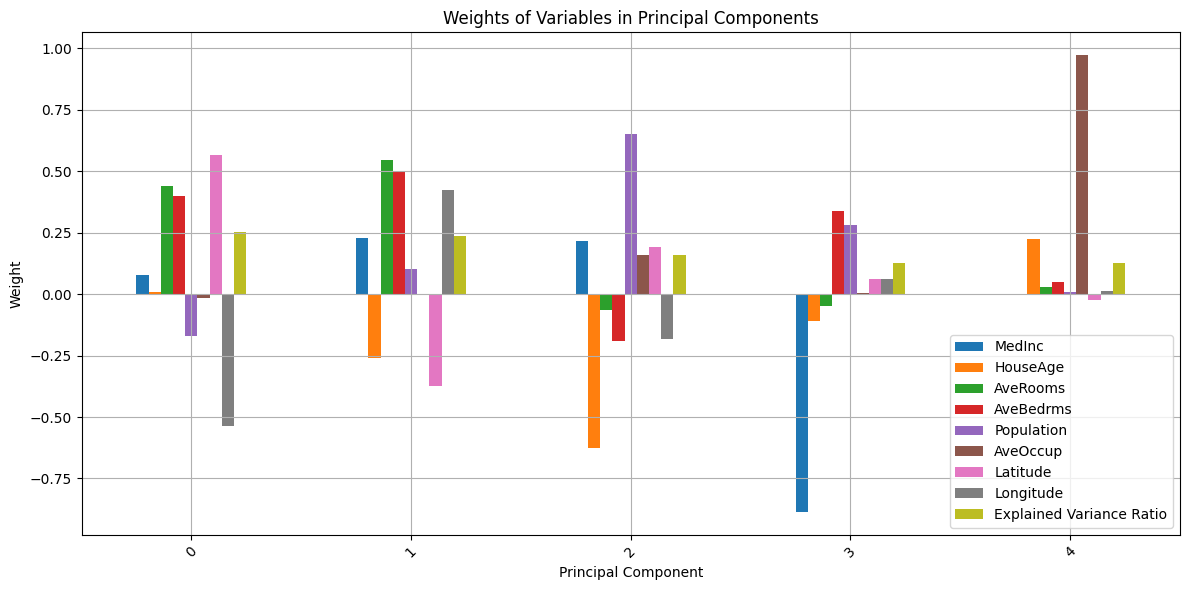

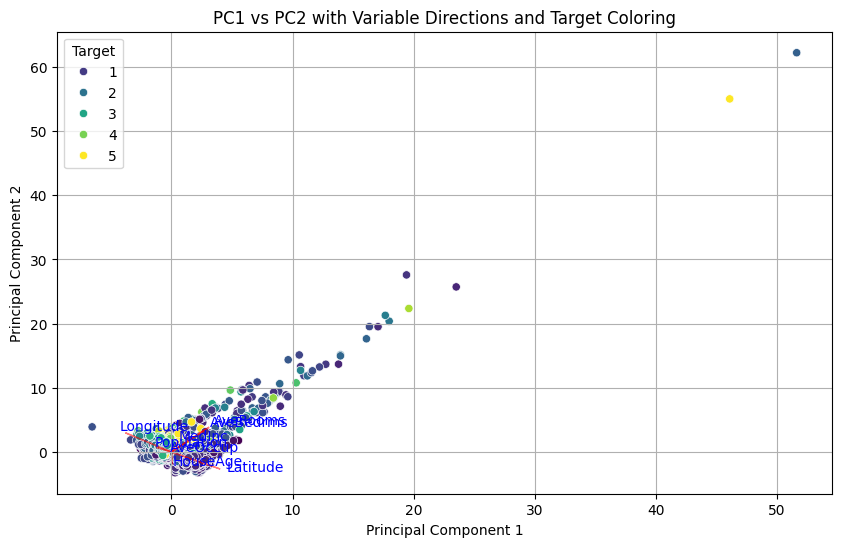

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 数値カラムのみを取得（targetは除く）
#numeric_columns = df.drop(columns=['target']).select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = ['MedInc',	'HouseAge',	'AveRooms',	'AveBedrms',	'Population',	'AveOccup',	'Latitude',	'Longitude']

# 数値カラムのみを抽出して標準化を実施
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_columns])

# 累積寄与率80%で主成分分析を実施
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

# 主成分の寄与率と累積寄与率を計算
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# 累積寄与率を折れ線グラフで描く
plt.plot(cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

# 主成分ごとの変数の重みを取得
weights = pd.DataFrame(pca.components_, columns=numeric_columns)

# 各主成分の寄与率を加える
weights_with_explained_variance_ratio = pd.concat([weights, pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio})], axis=1)

# データフレームをcsvで保存
weights_with_explained_variance_ratio.to_csv('weights_with_explained_variance_ratio.csv', index=False)

# 各主成分のカラムをx軸とした棒グラフを作成
plt.figure(figsize=(10, 6))
weights_with_explained_variance_ratio.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Principal Component')
plt.ylabel('Weight')
plt.title('Weights of Variables in Principal Components')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

# PC1とPC2の散布図を作成し、各カラムの方向を矢印で示し、各点をtargetの値で色分けする
pc_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pc_df['target'] = df['target']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='target', palette='viridis')
for i, column in enumerate(weights.columns):
    plt.arrow(0, 0, weights.iloc[0, i]*7, weights.iloc[1, i]*7, color='red', alpha=0.5, width=0.01)
    plt.text(pca.components_[0, i]*8, pca.components_[1, i]*8, column, color='blue', fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2 with Variable Directions and Target Coloring')
plt.legend(title='Target')
plt.grid(True)
plt.show()


## 精度向上の取り組み：主成分分析の利用

### GPT プロンプト : クラスタリング

* PCAによって得られた射影行列を使用して、元のデータを主成分空間に射影する(累積寄与率が80％)
* 目的変数はtarget
* 説明変数はtarget以外の数値カラムを候補とし、主成分分析で得られた射影行列で線形変換する
* statsmodelを利用する
* 交差検証法(cv=5)で精度確認をする
* 予測値と実際の需要を含む 'pca_value' 列をデータフレームに追加し、実際の需要と予測された需要の比較を行う。
* 実際の値と予測された値(stepwise_value)の比較グラフ
* 予測値と実際の値の誤差を計算し、indexを横軸にしてプロットする(残差プロット)。
* 実際の値と予測された値の散布図をプロットし、完全な予測を示す対角線を含めるグラフ
* AIC（赤池情報量基準）、決定係数$R^2$ 、および自由度修正済み決定係数$R^2_{adj}$、RMSEの値を表示
* Pythonコード

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     3439.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:51:58   Log-Likelihood:                -25986.
No. Observations:               20640   AIC:                         5.198e+04
Df Residuals:                   20634   BIC:                         5.203e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0686      0.006    348.666      0.0

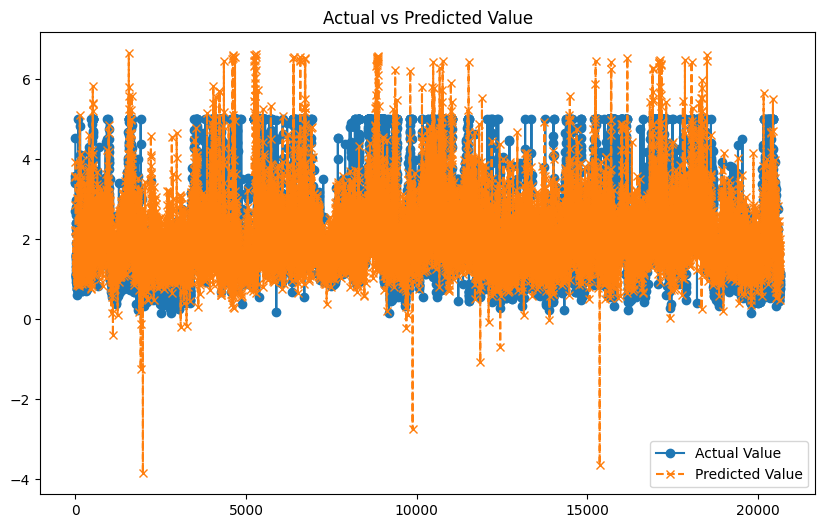

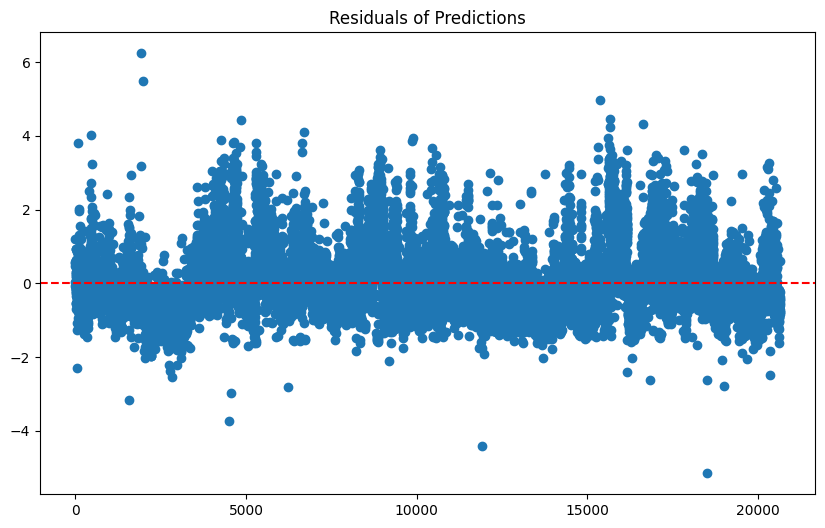

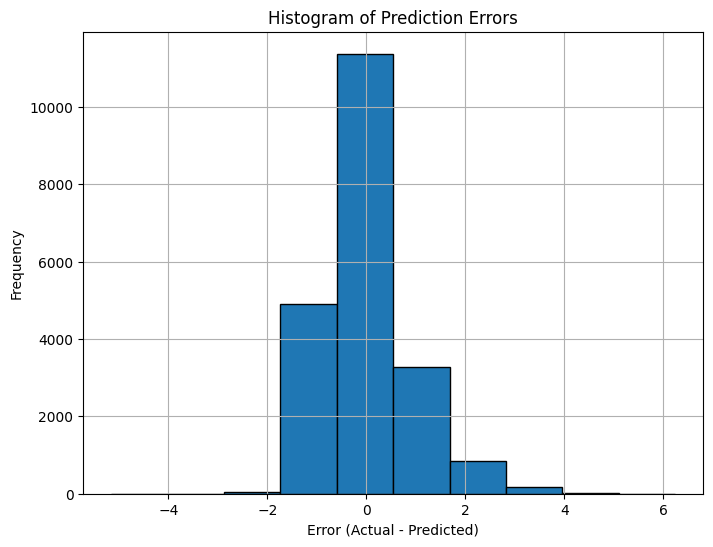

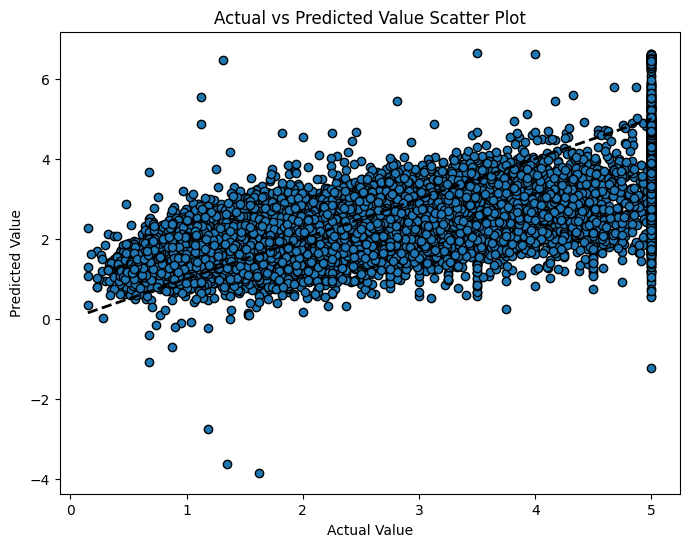

AIC: 51984.46828680419
R-squared: 0.45456684754808896
Adjusted R-squared: 0.4544346790028597
RMSE: 0.8522157460537259


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# データの準備（この部分は省略されていますが、dfを既に定義していると仮定）
# df = pd.read_csv('path_to_your_data.csv')

# 説明変数（数値カラム）と目的変数を定義
X = df[['MedInc',	'HouseAge',	'AveRooms',	'AveBedrms',	'Population',	'AveOccup',	'Latitude',	'Longitude']].copy()
y = df['target']

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCAの実行
pca = PCA(n_components=0.8)  # 累積寄与率が80%になるまでの成分を保持
X_pca = pca.fit_transform(X_scaled)

# 主成分の数
n_pcs= pca.n_components_

# 重回帰モデルの構築
X_pca_with_const = sm.add_constant(X_pca)
model = sm.OLS(y, X_pca_with_const).fit()

# モデルの要約を表示
print(model.summary())

# 予測値の計算
df['predicted_pca'] = model.predict(X_pca_with_const)

# 実際の値と予測値の残差
df['residual'] = df['target'] - df['predicted_pca']

# 予測値と実際の値の比較プロット
plt.figure(figsize=(10, 6))
plt.plot(df['target'], label='Actual Value', marker='o')
plt.plot(df['predicted_pca'], label='Predicted Value', linestyle='--', marker='x')
plt.legend()
plt.title('Actual vs Predicted Value')
plt.show()

# 残差プロット
plt.figure(figsize=(10, 6))
plt.plot(df['residual'], marker='o', linestyle='')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Predictions')
plt.show()

# 誤差のヒストグラムを描く
plt.figure(figsize=(8, 6))
plt.hist(df['residual'], bins=10, edgecolor='black')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()


# 実際の値と予測値の散布図
plt.figure(figsize=(8, 6))
plt.scatter(df['target'], df['predicted_pca'], edgecolor='black')
plt.plot([df['target'].min(), df['target'].max()], [df['target'].min(), df['target'].max()], 'k--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Value Scatter Plot')
plt.show()

print(f"AIC: {model.aic}")
print(f"R-squared: {model.rsquared}")
print(f"Adjusted R-squared: {model.rsquared_adj}")
# RMSEの計算
rmse = np.sqrt(mean_squared_error(df['target'], df['predicted_pca']))
print(f"RMSE: {rmse}")



### GPT プロンプト
* この主成分分析の射影行列を用いた回帰モデルを関数化
* 簡単な例で予測を行う
* Pythonコード

In [17]:
def predict_pca_values(new_data, pca, scaler, model):
    """
    新しいデータに対してPCA変換と予測を行う関数。

    Parameters:
    - new_data: 新しいデータ (numpy array or pandas DataFrame)
    - pca: 既にフィットされたPCAオブジェクト
    - scaler: 既にフィットされたStandardScalerオブジェクト
    - model: 既にフィットされた回帰モデル(statsmodelsのOLSモデル)

    Returns:
    - predicted_values: 予測値
    """
    # データの標準化
    new_data_scaled = scaler.transform(new_data)
    # PCA変換
    new_data_pca = pca.transform(new_data_scaled)

    # 定数項（1）を手動で追加
    new_data_pca_with_const = np.hstack([np.ones((new_data_pca.shape[0], 1)), new_data_pca])
    #new_data_pca_with_const = sm.add_constant(new_data_pca) (上手く動作しない)

    # 予測値の計算
    predicted_values = model.predict(new_data_pca_with_const)

    return predicted_values

# 新しいデータの例
new_data_example = pd.DataFrame(data=[[8.3252,	41.0,	6.984127,	1.023810,	322.0,	2.555556,	37.88,	-122.23]], columns=X.columns)

# 予測関数を使用して予測値を計算
predicted_values_example = predict_pca_values(new_data_example, pca, scaler, model)

print("Predicted Value:", predicted_values_example[0])


Predicted Value: 3.935202347041986


## 6. ベイジアンネットワーク

ベイジアンネットワーク（Bayesian Network）は、確率的グラフィカルモデルの一種であり、変数間の依存関係を表現するために使用されます。ベイジアンネットワークは、確率的な因果関係や依存関係をグラフの形式で表現し、ベイジアン統計学の原理に基づいて推論や予測を行うためのツールです。

ベイジアンネットワークの概要：

1. **ノード（Nodes）**：
   - ノードは変数を表し、その変数が表す事象を示します。例えば、病気の有無、症状の有無、治療法などがノードになります。

2. **エッジ（Edges）**：
   - エッジはノード間の依存関係を表します。あるノードから別のノードへのエッジがある場合、それらの変数間には因果関係や依存関係が存在することを示します。

3. **条件付き確率表（Conditional Probability Tables, CPT）**：
   - 各ノードには、そのノードが他のノードに依存する場合の条件付き確率が含まれます。これは、ノードの親ノードの状態に応じて、そのノードが特定の状態になる確率を示します。

4. **グラフ構造**：
   - ベイジアンネットワークは、ノードとエッジのグラフ構造で表されます。このグラフ構造は、変数間の因果関係や依存関係を視覚的に示します。

ベイジアンネットワークの分析の流れ：

1. **モデルの構築**：
   - 分析の最初のステップは、ベイジアンネットワークの構築です。これには、問題領域の理解、変数の特定、変数間の因果関係の推定が含まれます。

2. **データの収集と前処理**：
   - モデルを構築するために、関連するデータを収集し、適切な形式に前処理します。これには欠損値の処理、データの変換、外れ値の除去などが含まれます。離散化のプロセスも重要。

3. **モデルの学習**：
   - データが利用可能な場合、ベイジアンネットワークのパラメータ（条件付き確率表）を学習します。これには、最尤推定やベイズ推定などの手法が使用されます。

4. **モデルの評価**：
   - 学習されたベイジアンネットワークを評価し、モデルの適合度や予測性能を評価します。これには、交差検証や情報規準などの手法が使用されます。構造学習で自動的にネットワークを作ることも多い。

5. **モデルの利用**：
   - 最終的に、学習されたベイジアンネットワークを使用して推論や予測を行います。これには、未知の事象の予測、因果関係の解明、意思決定支援などが含まれます。

ベイジアンネットワークは、医療診断、リスク評価、金融モデリング、自然言語処理など、さまざまな領域で幅広く活用されています。

### 6.1 データの離散化

### GPT プロンプト : データの離散化
* 与えられたデータフレーム df をコピーし、非数値列を除外して数値列のみを取得する
* 各数値特徴量を等頻度ビニングで3つのカテゴリ(Low, Medium, High)に分割し、新しいカテゴリ列を作成する
* 離散化されたデータのみを含む新しいデータフレーム df_discrete を作成し、それをCSVファイルとして保存する
* Pythonコード

In [19]:
import pandas as pd

# データフレームのコピーを作成し、非数値列を除外して数値列のみを取得する
df_copy = df[['MedInc',	'HouseAge',	'AveRooms',	'AveBedrms',	'Population',	'AveOccup',	'Latitude',	'Longitude', 'target']].copy()

# 各数値特徴量を等頻度ビニングで3つのカテゴリ(Low, Medium, High)に分割し、新しいカテゴリ列を作成する
df_discrete = pd.DataFrame()
for column in df_copy.columns:
    if df_copy[column].nunique() > 2:  # 2値を取るカラム以外の場合
        df_discrete[column + '_category'] = pd.qcut(df_copy[column], q=3, labels=['Low', 'Medium', 'High'])

# 離散化されたデータのみを含む新しいデータフレームをCSVファイルとして保存する
df_discrete.to_csv('df_discrete.csv', index=False)
df_discrete

MedInc_category HouseAge_category AveRooms_category AveBedrms_category  \
0                High              High              High             Medium   
1                High               Low              High                Low   
2                High              High              High             Medium   
3                High              High              High             Medium   
4              Medium              High              High               High   
...               ...               ...               ...                ...   
20635             Low            Medium            Medium               High   
20636             Low               Low              High               High   
20637             Low               Low            Medium               High   
20638             Low               Low            Medium               High   
20639             Low               Low            Medium               High   

      Population_category AveOccup_category Latitude_category  \
0                     Low               Low              High   
1                    High               Low              High   
2                     Low            Medium              High   
3                     Low               Low              High   
4                     Low               Low              High   
...                   ...               ...               ...   
20635                 Low               Low              High   
20636                 Low              High              High   
20637              Medium               Low              High   
20638                 Low               Low              High   
20639              Medium            Medium              High   

      Longitude_category target_category  
0                    Low            High  
1                    Low            High  
2                    Low            High  
3                    Low            High  
4                    Low            High  
...                  ...             ...  
20635             Medium             Low  
20636                Low             Low  
20637                Low             Low  
20638                Low             Low  
20639                Low             Low  

[20640 rows x 9 columns]

### 6.2 構造学習(pgmpy利用)

ベイジアンネットワークの構造学習は、与えられたデータから最適なベイジアンネットワークの構造（つまり、ノード間の依存関係や結合強度）を推定するタスクです。ベイジアンネットワークは、変数間の因果関係を表現するための確率的なグラフモデルであり、構造学習はそのグラフ構造を特定するための手法です。

ベイジアンネットワークの構造学習には、主に2つのアプローチがあります。

1. 制約ベースの学習（Constraint-Based Learning）: このアプローチでは、データセットから条件付き独立性を見つけ出し、それを使用してベイジアンネットワークの構造を推定します。代表的なアルゴリズムとしては、PCアルゴリズム（PC algorithm）やGESアルゴリズム（Greedy Equivalence Search algorithm）などがあります。これらのアルゴリズムは、データから条件付き独立性を推定し、それを基にネットワークの構造を推測します。

2. スコアベースの学習（Score-Based Learning）: このアプローチでは、ネットワーク構造の候補を評価するスコア関数を定義し、最適な構造を選択します。代表的なアルゴリズムには、ベイジアン情報規準（Bayesian Information Criterion、BIC）や最大事後確率（Maximum A Posteriori、MAP）推定を使用する方法があります。これらのアルゴリズムは、モデルの複雑さとフィット度をバランスさせることで最適なモデルを見つけます。

構造学習の目的は、与えられたデータに最も適合するベイジアンネットワークの構造を見つけることです。適切な構造を持つベイジアンネットワークは、データの生成プロセスを正確にモデル化し、変数間の因果関係を理解するのに役立ちます。

In [20]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 920.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

### GPT プロンプト : 構造学習

* `pgmpy` ライブラリから必要なモジュールをインポートする。
* 離散化されたデータフレーム`df_discrete`を利用する
* `pgmpy.estimators.HillClimbSearch` を使用して、BICスコアを指標として最適なモデル構造を探索する。
* 探索された最適なモデル構造を使用して、`pgmpy.models.BayesianModel` を初期化する。
* モデルのパラメータ学習には、最尤推定法 (`pgmpy.estimators.MaximumLikelihoodEstimator`) を使用する。
* 学習された条件付き確率表（CPT）を表示する。


In [21]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator

# BICスコアを用いたヒルクライミング検索を初期化
hc = HillClimbSearch(df_discrete)

# BICスコアを指定して最適なモデル構造を推定
best_model = hc.estimate(scoring_method=BicScore(df_discrete))
print("Best model structure:", best_model.edges())

# モデルの初期化
model = BayesianModel(best_model.edges())

# パラメータ学習（最尤推定法を使用）
model.fit(df_discrete, estimator=MaximumLikelihoodEstimator)

# 学習された条件付き確率表（CPT）の表示
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)


  0%|          | 0/1000000 [00:00<?, ?it/s]

Best model structure: [('MedInc_category', 'AveBedrms_category'), ('HouseAge_category', 'Longitude_category'), ('AveRooms_category', 'HouseAge_category'), ('AveRooms_category', 'AveOccup_category'), ('AveRooms_category', 'Population_category'), ('AveRooms_category', 'Longitude_category'), ('AveRooms_category', 'AveBedrms_category'), ('AveRooms_category', 'MedInc_category'), ('AveBedrms_category', 'Population_category'), ('Population_category', 'HouseAge_category'), ('AveOccup_category', 'Population_category'), ('AveOccup_category', 'HouseAge_category'), ('AveOccup_category', 'AveBedrms_category'), ('AveOccup_category', 'MedInc_category'), ('Latitude_category', 'Longitude_category'), ('Latitude_category', 'AveOccup_category'), ('Latitude_category', 'target_category'), ('Latitude_category', 'AveRooms_category'), ('target_category', 'MedInc_category'), ('target_category', 'Longitude_category'), ('target_category', 'AveOccup_category'), ('target_category', 'AveRooms_category')]
CPD of MedI

### GPT プロンプト

* 学習されたベイジアンネットワークの構造は、以下のエッジで与えられる：`best_model.edges()`
* グラフ描画には、`networkx`と`matplotlib`を使用する。
* 描画されたグラフは、ノードとエッジを明確に区別し、エッジには矢印が表示されるようにする。
* ノードのラベル、ノードの大きさ、ノードの色、フォントサイズなどの詳細な描画設定を適切に調整する。
* 学習されたベイジアンネットワークの構造を可視化したグラフを出力する。

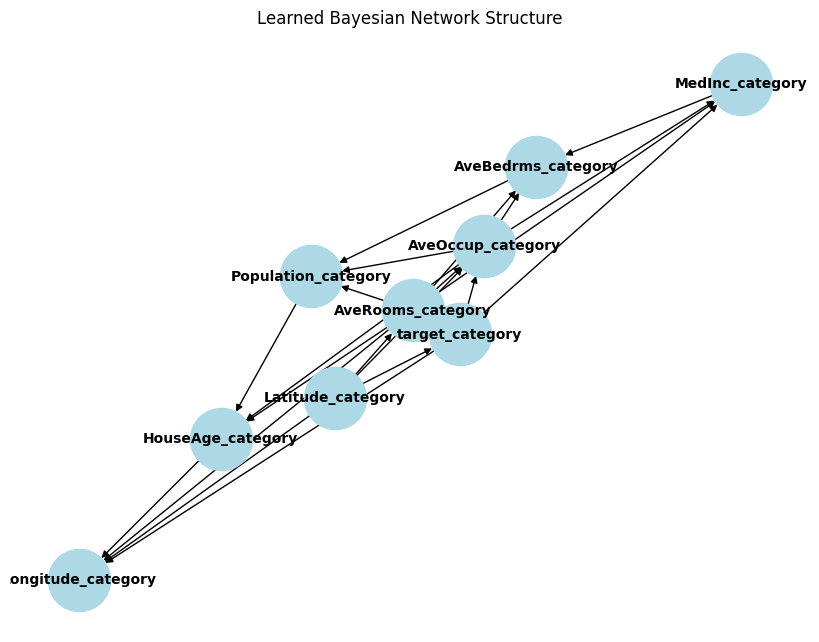

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# 学習されたベイジアンネットワークのエッジを取得
edges = best_model.edges()

# ベイジアンネットワークのグラフオブジェクトを作成
G = nx.DiGraph(edges)

# グラフの描画
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # ノードの配置アルゴリズムを指定
nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Learned Bayesian Network Structure")
plt.show()


## 6.3 確率的推論の実施

In [24]:
from pgmpy.inference import VariableElimination

# 推論オブジェクトの作成
inference = VariableElimination(model)

# 特定の変数の確率分布をクエリ
result = inference.query(variables=['MedInc_category'], evidence={'target_category': 'High'})

# 結果の表示
print(result)


+-------------------------+------------------------+
| MedInc_category         |   phi(MedInc_category) |
+=========================+========================+
| MedInc_category(High)   |                 0.6608 |
+-------------------------+------------------------+
| MedInc_category(Low)    |                 0.0843 |
+-------------------------+------------------------+
| MedInc_category(Medium) |                 0.2549 |
+-------------------------+------------------------+


In [25]:
from pgmpy.inference import VariableElimination

# 推論オブジェクトの作成
inference = VariableElimination(model)

# 特定の変数の確率分布をクエリ
result = inference.query(variables=['Population_category'], evidence={'target_category': 'High'})

# 結果の表示
print(result)


+-----------------------------+----------------------------+
| Population_category         |   phi(Population_category) |
+=============================+============================+
| Population_category(High)   |                     0.2950 |
+-----------------------------+----------------------------+
| Population_category(Low)    |                     0.3725 |
+-----------------------------+----------------------------+
| Population_category(Medium) |                     0.3325 |
+-----------------------------+----------------------------+


In [26]:
from pgmpy.inference import VariableElimination

# 推論オブジェクトの作成
inference = VariableElimination(model)

# 特定の変数の確率分布をクエリ
result = inference.query(variables=['AveRooms_category'], evidence={'target_category': 'High'})

# 結果の表示
print(result)


+---------------------------+--------------------------+
| AveRooms_category         |   phi(AveRooms_category) |
+===========================+==========================+
| AveRooms_category(High)   |                   0.5173 |
+---------------------------+--------------------------+
| AveRooms_category(Low)    |                   0.2298 |
+---------------------------+--------------------------+
| AveRooms_category(Medium) |                   0.2529 |
+---------------------------+--------------------------+
